In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#pip install catboost

In [2]:
df= pd.read_csv("BF_model_dataa.csv")
df.head(9)

,BodyFatPercentage,Age,Weight_kg,Height_m,Height,Neck_Size,Abdomen_Size,Chest_Size,Hip_Size,Thigh_Size,Waist_Size,Knee_Size,Biceps_Size,Forearm_Size,Wrist_Size,BMI
0,20.61,21,55.5,1.67,167.0,34.0,76.0,86.0,90.0,51.0,84.0,35.0,29.0,25.0,16.0,19.900319
1,25.70,50,71.5,1.66,166.0,39.0,100.0,95.0,102.0,51.0,96.0,40.0,29.0,28.0,17.0,25.947162
2,12.28,22,54.0,1.63,163.0,36.0,68.0,84.0,91.0,46.0,75.0,34.0,24.0,24.0,17.0,20.324438
3,20.11,26,63.7,1.74,174.0,36.0,82.0,89.0,91.0,45.0,87.0,33.0,28.0,27.0,18.0,21.039767
4,22.76,28,64.5,1.71,171.0,34.0,90.0,87.0,91.0,43.0,88.0,36.0,28.0,27.0,17.0,22.058069
5,25.48,48,68.2,1.60,160.0,37.0,93.0,88.0,99.0,46.0,92.0,37.0,29.0,27.0,19.0,26.640625
6,28.72,23,74.5,1.67,167.0,35.0,96.0,95.0,102.0,52.0,97.0,38.0,27.0,26.0,19.0,26.713041
7,20.81,20,57.5,1.70,170.0,33.0,80.0,84.0,86.0,48.0,84.0,36.0,25.0,24.0,17.0,19.896194
8,18.57,20,57.0,1.70,170.0,34.0,81.0,80.0,92.0,50.0,82.0,33.0,26.0,25.0,18.0,19.723183


In [3]:
df.columns

Index(['BodyFatPercentage', 'Age ', 'Weight_kg', 'Height_m', 'Height',
       'Neck_Size', 'Abdomen_Size', 'Chest_Size', 'Hip_Size', 'Thigh_Size',
       'Waist_Size', 'Knee_Size', 'Biceps_Size', 'Forearm_Size', 'Wrist_Size',
       'BMI'],
      dtype='object')

In [4]:
df.drop(columns=['Height_m'],inplace=True)

In [5]:
df.columns

Index(['BodyFatPercentage', 'Age ', 'Weight_kg', 'Height', 'Neck_Size',
       'Abdomen_Size', 'Chest_Size', 'Hip_Size', 'Thigh_Size', 'Waist_Size',
       'Knee_Size', 'Biceps_Size', 'Forearm_Size', 'Wrist_Size', 'BMI'],
      dtype='object')

In [6]:
df1 = df.drop(columns=['Age ', 'Weight_kg', 'Neck_Size',
        'Chest_Size', 'Thigh_Size',
       'Knee_Size', 'Biceps_Size', 'Forearm_Size', 'Wrist_Size'])

In [7]:
df1.head(3)

,BodyFatPercentage,Height,Abdomen_Size,Hip_Size,Waist_Size,BMI
0,20.61,167.0,76.0,90.0,84.0,19.900319
1,25.70,166.0,100.0,102.0,96.0,25.947162
2,12.28,163.0,68.0,91.0,75.0,20.324438


In [8]:
x = df1.iloc[:,1:]
y = df1.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [11]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((257, 5), (65, 5), (257,), (65,))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
#from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [13]:
LR = LinearRegression()
LR.fit(xtrain,ytrain)
pred_lr=LR.predict(xtest)
r2_LR = r2_score(pred_lr,ytest)
mae_LR = mean_absolute_error(pred_lr,ytest)
mse_LR = mean_squared_error(pred_lr,ytest)
print("R2 Score is : ",r2_LR)
print("MAE  is : ",mae_LR)
print("MSE is : ",mse_LR)
y_pred = LR.predict(xtrain)
residuals =ytrain.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))  #close to 0 so good

R2 Score is :  0.7209138664529157
MAE  is :  3.4145747647721985
MSE is :  20.382371267024947
Mean of Residuals 7.824264366541182e-15


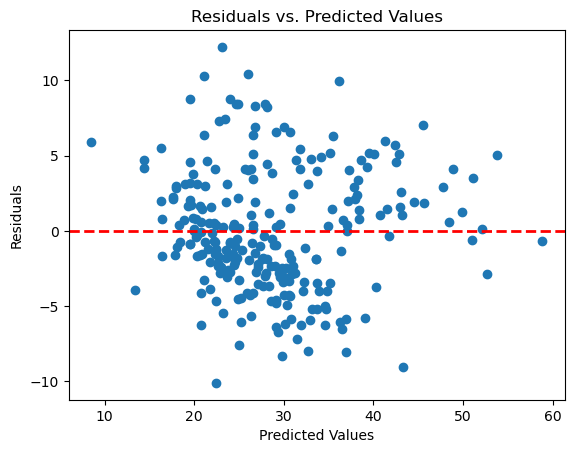

In [14]:
import matplotlib.pyplot as plt

# Assuming LR is your Linear Regression model
y_pred = LR.predict(xtrain)
residuals = ytrain.values - y_pred

# Plot residuals vs. predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [15]:
DT = DecisionTreeRegressor()
DT.fit(xtrain,ytrain)
pred_DT=DT.predict(xtest)
r2_DT = r2_score(pred_DT,ytest)
mae_DT = mean_absolute_error(pred_DT,ytest)
mse_DT = mean_squared_error(pred_DT,ytest)
print("R2 Score is : ",r2_DT)
print("MAE  is : ",mae_DT)
print("MSE is : ",mse_DT)

R2 Score is :  0.5152995712259172
MAE  is :  4.048615384615383
MSE is :  34.87807076923077


In [16]:
RF = RandomForestRegressor()
RF.fit(xtrain,ytrain)
pred_RF=RF.predict(xtest)
r2_RF = r2_score(pred_RF,ytest)
mae_RF = mean_absolute_error(pred_RF,ytest)
mse_RF = mean_squared_error(pred_RF,ytest)
print("R2 Score is : ",r2_RF)
print("MAE  is : ",mae_RF)
print("MSE is : ",mse_RF)

R2 Score is :  0.5876168266858725
MAE  is :  3.3305446153846168
MSE is :  21.171182602153866


In [17]:
SV =SVR(kernel="linear")
SV.fit(xtrain,ytrain)
pred_SV=SV.predict(xtest)
r2_SV = r2_score(pred_SV,ytest)
mae_SV = mean_absolute_error(pred_SV,ytest)
mse_SV = mean_squared_error(pred_SV,ytest)
print("R2 Score is : ",r2_SV)
print("MAE  is : ",mae_SV)
print("MSE is : ",mse_SV)

R2 Score is :  0.7224444961144686
MAE  is :  3.447700065710239
MSE is :  21.953427749742307


In [18]:
# nb = GaussianNB()
# nb.fit(xtrain,ytrain)
# pred_nb=nb.predict(xtest)
# r2_nb = r2_score(pred_nb,ytest)
# mae_nb = mean_absolute_error(pred_nb,ytest)
# mse_nb = mean_squared_error(pred_nb,ytest)
# print("R2 Score is : ",r2_nb)
# print("MAE  is : ",mae_nb)
# print("MSE is : ",mse_nb)

In [19]:
knn =KNeighborsRegressor()
knn.fit(xtrain,ytrain)
pred_knn=knn.predict(xtest)
r2_knn = r2_score(pred_knn,ytest)
mae_knn = mean_absolute_error(pred_knn,ytest)
mse_knn = mean_squared_error(pred_knn,ytest)
print("R2 Score is : ",r2_knn)
print("MAE  is : ",mae_knn)
print("MSE is : ",mse_knn)

R2 Score is :  0.5178842830937425
MAE  is :  3.8034153846153846
MSE is :  25.148554400000002


In [20]:
xgb = XGBRegressor()
xgb.fit(xtrain,ytrain)
pred_xgb=xgb.predict(xtest)
r2_xgb = r2_score(pred_xgb,ytest)
mae_xgb = mean_absolute_error(pred_xgb,ytest)
mse_xgb = mean_squared_error(pred_xgb,ytest)
print("R2 Score is : ",r2_xgb)
print("MAE  is : ",mae_xgb)
print("MSE is : ",mse_xgb)

R2 Score is :  0.7163729190178496
MAE  is :  3.1529614187387316
MSE is :  19.086341359803836


In [21]:
adb = AdaBoostRegressor()
adb.fit(xtrain,ytrain)
pred_adb=adb.predict(xtest)
r2_adb = r2_score(pred_adb,ytest)
mae_adb = mean_absolute_error(pred_adb,ytest)
mse_adb = mean_squared_error(pred_adb,ytest)
print("R2 Score is : ",r2_adb)
print("MAE  is : ",mae_adb)
print("MSE is : ",mse_adb)

R2 Score is :  0.08234322619043322
MAE  is :  4.644125175812021
MSE is :  28.56567423513117


In [22]:
cat = CatBoostRegressor()
cat.fit(xtrain,ytrain)
pred_cat=cat.predict(xtest)
r2_cat = r2_score(pred_cat,ytest)
mae_cat = mean_absolute_error(pred_cat,ytest)
mse_cat = mean_squared_error(pred_cat,ytest)
print("R2 Score is : ",r2_cat)
print("MAE  is : ",mae_cat)
print("MSE is : ",mse_cat)

NameError: name 'CatBoostRegressor' is not defined

In [23]:
gb = GradientBoostingRegressor()
gb.fit(xtrain,ytrain)
pred_gb=gb.predict(xtest)
r2_gb = r2_score(pred_gb,ytest)
mae_gb = mean_absolute_error(pred_gb,ytest)
mse_gb = mean_squared_error(pred_gb,ytest)
print("R2 Score is : ",r2_gb)
print("MAE  is : ",mae_gb)
print("MSE is : ",mse_gb)

R2 Score is :  0.6580792345779358
MAE  is :  3.2308027349407498
MSE is :  19.70537654329371


In [24]:
# ['Height', 'Hip_Size', 'Waist_Size', 'Neck_Size', 'BMI'],

In [25]:
df2 = df.drop(columns=[ 'Age ', 'Weight_kg',
       'Abdomen_Size', 'Chest_Size', 'Thigh_Size',
       'Knee_Size', 'Biceps_Size', 'Forearm_Size', 'Wrist_Size'])

In [26]:
df2.head(3)

,BodyFatPercentage,Height,Neck_Size,Hip_Size,Waist_Size,BMI
0,20.61,167.0,34.0,90.0,84.0,19.900319
1,25.70,166.0,39.0,102.0,96.0,25.947162
2,12.28,163.0,36.0,91.0,75.0,20.324438


In [27]:
x2 = df2.iloc[:,1:]
y2 = df2.iloc[:,0]

In [28]:
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x2,y2,test_size=0.20,random_state=1)

In [29]:
LR2 = LinearRegression()
LR2.fit(xtrain2,ytrain2)
pred_lr2=LR2.predict(xtest2)
r2_LR2 = r2_score(pred_lr2,ytest2)
mae_LR2 = mean_absolute_error(pred_lr2,ytest2)
mse_LR2 = mean_squared_error(pred_lr2,ytest2)
print("R2 Score is : ",r2_LR2)
print("MAE  is : ",mae_LR2)
print("MSE is : ",mse_LR2)

R2 Score is :  0.7663963527851385
MAE  is :  3.0091257656660835
MSE is :  17.13239133893438


In [30]:
DT2 = DecisionTreeRegressor()
DT2.fit(xtrain2,ytrain2)
pred_DT2=DT2.predict(xtest2)
r2_DT2 = r2_score(pred_DT2,ytest2)
mae_DT2 = mean_absolute_error(pred_DT2,ytest2)
mse_DT2 = mean_squared_error(pred_DT2,ytest2)
print("R2 Score is : ",r2_DT2)
print("MAE  is : ",mae_DT2)
print("MSE is : ",mse_DT2)

R2 Score is :  0.6047063892870191
MAE  is :  3.857538461538461
MSE is :  32.294476923076914


In [31]:
RF2 = RandomForestRegressor()
RF2.fit(xtrain2,ytrain2)
pred_RF2=RF2.predict(xtest2)
r2_RF2 = r2_score(pred_RF2,ytest2)
mae_RF2 = mean_absolute_error(pred_RF2,ytest2)
mse_RF2 = mean_squared_error(pred_RF2,ytest2)
print("R2 Score is : ",r2_RF2)
print("MAE  is : ",mae_RF2)
print("MSE is : ",mse_RF2)

R2 Score is :  0.6435194144491281
MAE  is :  3.161063076923077
MSE is :  18.8583070903077


In [32]:
SV2 =SVR(kernel="linear")
SV2.fit(xtrain2,ytrain2)
pred_SV2=SV2.predict(xtest2)
r2_SV2 = r2_score(pred_SV2,ytest2)
mae_SV2 = mean_absolute_error(pred_SV2,ytest2)
mse_SV2 = mean_squared_error(pred_SV2,ytest2)
print("R2 Score is : ",r2_SV2)
print("MAE  is : ",mae_SV2)
print("MSE is : ",mse_SV2)

R2 Score is :  0.7518494677124731
MAE  is :  3.136553236368205
MSE is :  20.253958307887515


In [33]:
knn2 =KNeighborsRegressor()
knn2.fit(xtrain2,ytrain2)
pred_knn2=knn2.predict(xtest2)
r2_knn2 = r2_score(pred_knn2,ytest2)
mae_knn2 = mean_absolute_error(pred_knn2,ytest2)
mse_knn2 = mean_squared_error(pred_knn2,ytest2)
print("R2 Score is : ",r2_knn2)
print("MAE  is : ",mae_knn2)
print("MSE is : ",mse_knn2)

R2 Score is :  0.5865000601860036
MAE  is :  3.4661230769230764
MSE is :  21.633503076923073


In [34]:
# nb2 = GaussianNB()
# nb2.fit(xtrain2,ytrain2)
# pred_nb2=nb2.predict(xtest2)
# r2_nb2 = r2_score(pred_nb2,ytest2)
# mae_nb2 = mean_absolute_error(pred_nb2,ytest2)
# mse_nb2 = mean_squared_error(pred_nb2,ytest2)
# print("R2 Score is : ",r2_nb2)
# print("MAE  is : ",mae_nb2)
# print("MSE is : ",mse_nb2)

In [35]:
xgb2 = XGBRegressor()
xgb2.fit(xtrain2,ytrain2)
pred_xgb2=xgb2.predict(xtest2)
r2_xgb2 = r2_score(pred_xgb2,ytest2)
mae_xgb2 = mean_absolute_error(pred_xgb2,ytest2)
mse_xgb2 = mean_squared_error(pred_xgb2,ytest2)
print("R2 Score is : ",r2_xgb2)
print("MAE  is : ",mae_xgb2)
print("MSE is : ",mse_xgb2)

R2 Score is :  0.6991827375171458
MAE  is :  3.0721390146108774
MSE is :  19.16991546118017


In [36]:
adb2 = AdaBoostRegressor()
adb2.fit(xtrain2,ytrain2)
pred_adb2=adb2.predict(xtest2)
r2_adb2 = r2_score(pred_adb2,ytest2)
mae_adb2 = mean_absolute_error(pred_adb2,ytest2)
mse_adb2 = mean_squared_error(pred_adb2,ytest2)
print("R2 Score is : ",r2_adb2)
print("MAE  is : ",mae_adb2)
print("MSE is : ",mse_adb2)

R2 Score is :  0.27603396938607916
MAE  is :  4.514932659414135
MSE is :  24.198698507160998


In [ ]:
cat2 = CatBoostRegressor()
cat2.fit(xtrain2,ytrain2)
pred_cat2=cat2.predict(xtest2)
r2_cat2 = r2_score(pred_cat2,ytest2)
mae_cat2 = mean_absolute_error(pred_cat2,ytest2)
mse_cat2 = mean_squared_error(pred_cat2,ytest2)
print("R2 Score is : ",r2_cat2)
print("MAE  is : ",mae_cat2)
print("MSE is : ",mse_cat2)

In [37]:
gb2 = GradientBoostingRegressor()
gb2.fit(xtrain2,ytrain2)
pred_gb2=gb2.predict(xtest2)
r2_gb2 = r2_score(pred_gb2,ytest2)
mae_gb2 = mean_absolute_error(pred_gb2,ytest2)
mse_gb2 = mean_squared_error(pred_gb2,ytest2)
print("R2 Score is : ",r2_gb2)
print("MAE  is : ",mae_gb2)
print("MSE is : ",mse_gb2)

R2 Score is :  0.7542216942120012
MAE  is :  2.5943618024201407
MSE is :  13.631106957217783


In [38]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# import pickle

# # Load your dataset (replace 'your_dataset.csv' with the actual file name)
# df = pd.read_csv('BF_model_dataa.csv')
# df = df.drop(columns=['Height_m'])

# # Separate features (X) and target variable (y)
# X = df.drop('BodyFatPercentage', axis=1)
# y = df['BodyFatPercentage']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# # Define a list of models to try
# models = [
#     ('Linear Regression', LinearRegression()),
#     ('Random Forest', RandomForestRegressor()),
#     ('Gradient Boosting', GradientBoostingRegressor())
# ]

# # Train and evaluate each model
# best_model_name = ''
# best_model = None
# best_r2_score = -1

# for model_name, model in models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     r2 = r2_score(y_test, y_pred)

#     print(f'{model_name} R2 Score: {r2}')

#     # Update the best model if the current model has a higher R2 score
#     if r2 > best_r2_score:
#         best_r2_score = r2
#         best_model_name = model_name
#         best_model = model

# # Save the best model using pickle
# with open('best_model.pkl', 'wb') as model_file:
#     pickle.dump(best_model, model_file)

# print(f'Best Model: {best_model_name} with R2 Score: {best_r2_score}')


In [44]:
X.columns

Index(['Height', 'Neck_Size', 'Hip_Size', 'Waist_Size'], dtype='object')

In [40]:
# # Import necessary libraries
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# import pickle

# # Load your dataset (replace 'your_dataset.csv' with the actual file name)
# df = pd.read_csv('BF_model_dataa.csv')
# df1 = df.drop(columns=['Age ', 'Weight_kg', 'Neck_Size',
#         'Chest_Size', 'Thigh_Size','Height_m',
#        'Knee_Size', 'Biceps_Size', 'Forearm_Size', 'Wrist_Size'])
# # Separate features (X) and target variable (y)
# X = df1.drop('BodyFatPercentage', axis=1)
# y = df1['BodyFatPercentage']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define a list of models to try
# models = [
#     ('Linear Regression', LinearRegression()),
#     ('Random Forest', RandomForestRegressor()),
#     ('Gradient Boosting', GradientBoostingRegressor())
# ]

# # Train and evaluate each model
# best_model_name = ''
# best_model = None
# best_r2_score = -1

# for model_name, model in models:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     r2 = r2_score(y_test, y_pred)

#     print(f'{model_name} R2 Score: {r2}')

#     # Update the best model if the current model has a higher R2 score
#     if r2 > best_r2_score:
#         best_r2_score = r2
#         best_model_name = model_name
#         best_model = model

# # Save the best model using pickle
# with open('best_model.pkl', 'wb') as model_file:
#     pickle.dump(best_model, model_file)

# print(f'Best Model: {best_model_name} with R2 Score: {best_r2_score}')


In [43]:
X.columns

Index(['Height', 'Neck_Size', 'Hip_Size', 'Waist_Size'], dtype='object')

In [42]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

# Load your dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('BF_model_dataa.csv')
df2 = df.drop(columns=[ 'Age ', 'Weight_kg',
       'Abdomen_Size', 'Chest_Size', 'Thigh_Size','Height_m',
       'Knee_Size', 'Biceps_Size', 'Forearm_Size', 'Wrist_Size','BMI'])
# Separate features (X) and target variable (y)
X = df2.drop('BodyFatPercentage', axis=1)
y = df2['BodyFatPercentage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to try
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

# Train and evaluate each model
best_model_name = ''
best_model = None
best_r2_score = -1

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    print(f'{model_name} R2 Score: {r2}')

    # Update the best model if the current model has a higher R2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_model_name = model_name
        best_model = model

# Save the best model using pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

print(f'Best Model: {best_model_name} with R2 Score: {best_r2_score}')

Linear Regression R2 Score: 0.8249321046561685
Random Forest R2 Score: 0.8015909036303852
Gradient Boosting R2 Score: 0.8149270902268253
Best Model: Linear Regression with R2 Score: 0.8249321046561685


In [45]:
 X.columns

Index(['Height', 'Neck_Size', 'Hip_Size', 'Waist_Size'], dtype='object')

In [46]:
df2.to_csv("web_data.csv",index=False)